scikit-learnでの精度評価の定義を確認する

In [33]:
import numpy as np
import seaborn as sns
import sklearn.datasets
import sklearn.svm

In [17]:
blobs, y = sklearn.datasets.make_blobs(n_samples=50, centers=[(0.5,2.25), (1.0, 2.0)], cluster_std=0.3)

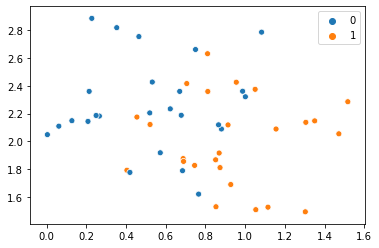

In [18]:
sns.scatterplot(blobs[:,0], blobs[:,1], hue=y)

In [25]:
clf = sklearn.svm.SVC(gamma="scale", probability=True)
fit = clf.fit(blobs, y)

In [26]:
prob = fit.predict_proba(blobs)
pred = fit.predict(blobs)

In [32]:
conf = sklearn.metrics.confusion_matrix(y, pred)
print(conf)

[[18  7]
 [ 6 19]]


In [40]:
print(f"precision={sklearn.metrics.precision_score(y, pred)}")
print(f"recall={sklearn.metrics.recall_score(y, pred)}")

precision=0.7307692307692307
recall=0.76


# scikit-learnの定義を確認する

In [35]:
conf[0,0] / np.sum(conf[0:,])

0.36

In [36]:
conf[1,1] / np.sum(conf[1:,])

0.76

In [37]:
conf[0,0] / np.sum(conf[:,0])

0.75

In [38]:
conf[1,1] / np.sum(conf[:,1])

0.7307692307692307

という挙動を見るに、sklearnの混合行列は、

||predited 0|predicted 1|
|---|---|---|
|true 0|True Negative|False Positive|
|true 1|False Negative|True Positive|

で、
- precision = TP / (FP + TP)
- recall = TP / (FN + TP)
と計算している